In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import  Entrez, Medline, SeqIO

In [2]:
# NCBI Eutilites # data extraction for mRNA transcripts
from Bio import Entrez
Entrez.email = 'nbhanda1@ramapo.edu'
handle = Entrez.esearch(db='nucleotide', term='Tumor Suppressors mRNA AND human[orgn]', retmax = 2000)
record = Entrez.read(handle)
handle.close()
Id_record = record['IdList']

# fetching the data 
fasta = Entrez.efetch(db='nucleotide', rettype = 'fasta', retmode = 'text', id=Id_record)
fasta_read = fasta.read()
fasta.close()
with open("suppressors_transcript.fasta", 'w') as f:
    f.write(fasta_read)
f.close()


In [3]:
from Bio import SeqIO

sequences = SeqIO.parse("suppressors_transcript.fasta", "fasta")
sfiltered_sequences = [seq for seq in sequences if "NM" in seq.id]
SeqIO.write(sfiltered_sequences, "snucleotide_seq.fasta", "fasta")
print(len(sfiltered_sequences))

533


Isoleucine codon frequency:
ATA: 15688
ATT: 16945
ATC: 14348


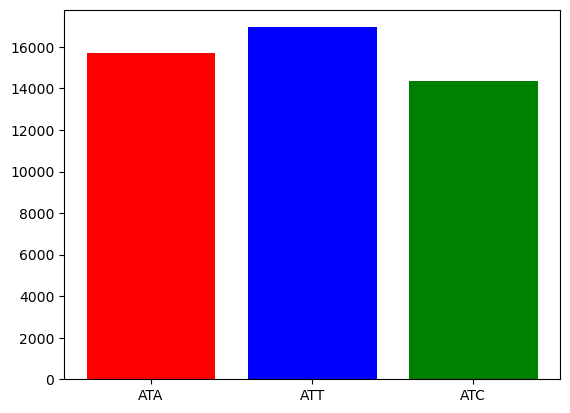

In [5]:
isoleucine_codons = ['ATA', 'ATC', 'ATT']

def codon_frequency(sequences, codons):
    frequency = {}
    for i in range(len(sequences)):
        sequence = sequences[i]
        codon = str()
        
        for nucleotide in sequence:
            codon += nucleotide
        
            if len(codon) % 3 == 0:
                if codon in isoleucine_codons:
                    try:
                        frequency[codon] += 1
                    except:
                        frequency[codon] = 1
                    codon = str()
                else:
                    codon = str()
    return frequency

input_file = "snucleotide_seq.fasta"
sequences1 = [str(record.seq) for record in SeqIO.parse(input_file, "fasta")]
frequency = codon_frequency(sequences1, isoleucine_codons)

print("Isoleucine codon frequency:")
for codon, count in frequency.items():
    print(f"{codon}: {count}")
codons = frequency.keys()
count = frequency.values()
plt.bar(codons, count, color = ['r', 'b', 'g'])
plt.show()

Isoleucine codon frequency:
ATA: 15688
ATT: 16945
ATC: 14348


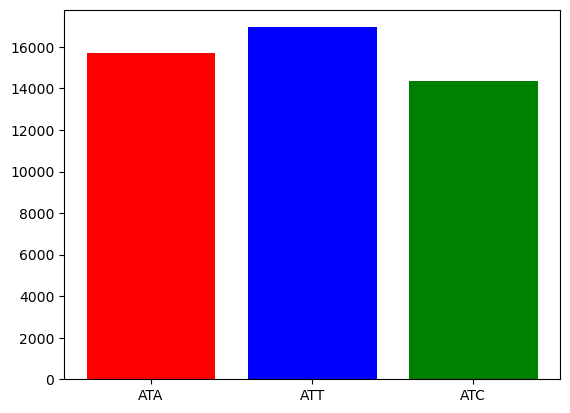

In [7]:
isoleucine_codons = ['ATA', 'ATC', 'ATT']

def codon_frequency(sequences, codons):
    frequency = {}
    for i in range(len(sequences)):
        sequence = sequences[i]
        for i in range(0, len(sequence), 3):
            codon = sequence[i:i+3]
            if codon in codons:
                if codon in frequency:
                    frequency[codon] += 1
                else:
                    frequency[codon] = 1
    return frequency


input_file = "snucleotide_seq.fasta"
sequences1 = [str(record.seq) for record in SeqIO.parse(input_file, "fasta")]
frequency = codon_frequency(sequences1, isoleucine_codons)

print("Isoleucine codon frequency:")
for codon, count in frequency.items():
    print(f"{codon}: {count}")
codons = frequency.keys()
count = frequency.values()
plt.bar(codons, count, color = ['r', 'b', 'g'])
plt.show()

In [8]:
# NCBI Eutilites # data extraction for mRNA transcripts
# looking for grotwh promoting mRNAs

from Bio import Entrez
Entrez.email = 'nbhanda1@ramapo.edu'
handle = Entrez.esearch(db='nucleotide', term='Tumor promoters]', retmax = 2000)
record = Entrez.read(handle)
handle.close()
Id_record = record['IdList']

# fetching the data 
fasta = Entrez.efetch(db='nucleotide', rettype = 'fasta', retmode = 'text', id=Id_record)
fasta_read = fasta.read()
fasta.close()
with open("promoters_transcript.fasta", 'w') as f:
    f.write(fasta_read)
f.close()

In [9]:
from Bio import SeqIO

sequences = SeqIO.parse("promoters_transcript.fasta", "fasta")
pfiltered_sequences = [seq for seq in sequences if "NM" in seq.id]
SeqIO.write(pfiltered_sequences, "pnucleotide_seq.fasta", "fasta")
print(len(pfiltered_sequences))

49


Isoleucine codon frequency:
ATA: 598
ATC: 706
ATT: 952


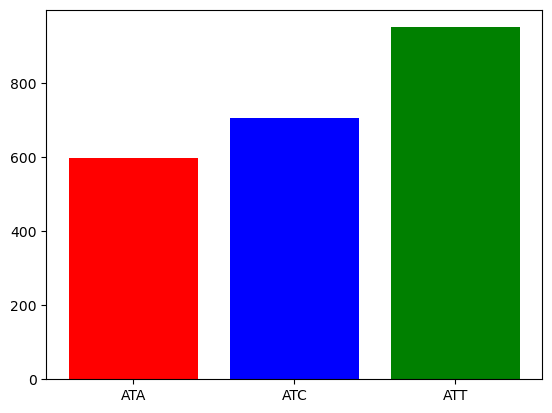

In [10]:
isoleucine_codons = ['ATA', 'ATC', 'ATT']

def codon_frequency(sequences, codons):
    frequency = {}
    for i in range(len(sequences)):
        sequence = sequences[i]
        codon = str()
        
        for nucleotide in sequence:
            codon += nucleotide
        
            if len(codon) % 3 == 0:
                if codon in codons:
                    try:
                        frequency[codon] += 1
                    except:
                        frequency[codon] = 0
                    codon = str()
                else:
                    codon = str()
    return frequency

input_file = "pnucleotide_seq.fasta"
sequences1 = [str(record.seq) for record in SeqIO.parse(input_file, "fasta")]
frequency = codon_frequency(sequences1, isoleucine_codons)

print("Isoleucine codon frequency:")
for codon, count in frequency.items():
    print(f"{codon}: {count}")
codons = frequency.keys()
count = frequency.values()
plt.bar(codons, count, color = ['r', 'b', 'g'])
plt.show()

In [11]:
handle = Entrez.esearch(db="nucleotide", term="tp53 mRNA [gene] AND human [ORGN]")  # search sequences by a combination of keywords
records = Entrez.read(handle)  #store records from search
print(records['Count'])  #This prints how many results there are from your search

0


In [12]:
#This retrieves the Genbank record for the top result
handle = Entrez.efetch(db="nucleotide", id=records['IdList'], rettype="fasta", retmode="text")
record = handle.read()
handle.close()
print(record)

Supplied+id+parameter+is+empty.



In [13]:
# sequences = SeqIO.parse("suppressors_transcript.fasta", "fasta")
tp53filtered_sequences = [seq for seq in record.Seq if "NM" in seq.id]


AttributeError: 'str' object has no attribute 'Seq'